## Shopify Questions

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

2.What metric would you report for this dataset?

3.What is its value?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [3]:
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [5]:
data.sort_values('order_amount',ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


In [6]:
data[data['order_amount']>=10000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


Text(0.5, 1.0, 'Boxplot')

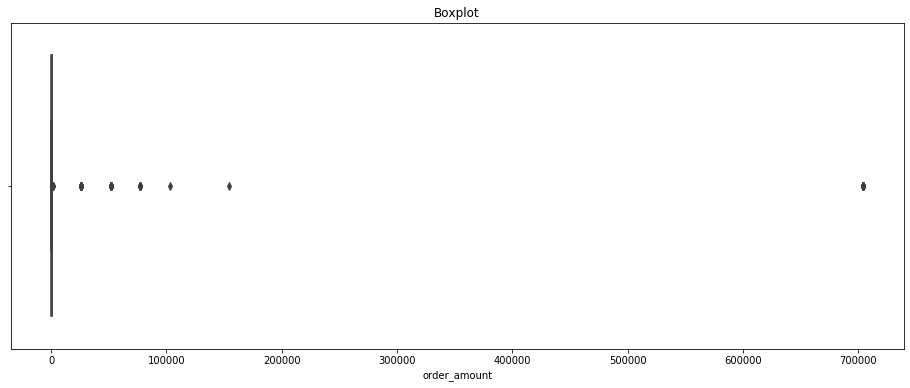

In [7]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=data['order_amount'])
plt.title('Boxplot order_amount')
#abs(df1['Actual Change in Price vs last Year']).describe()

We shall remove any observation for which the total order amount was greater than 1000.

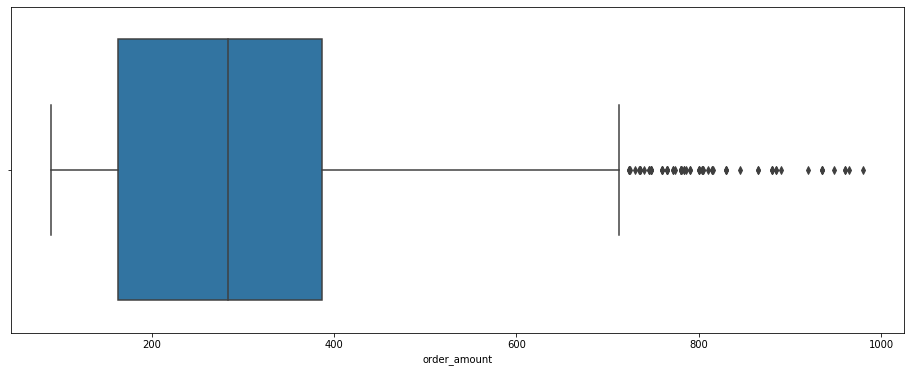

In [8]:
df1 = data.copy()
indexNames = df1[df1['order_amount'] > 1000].index
#indexNames are index values of change in prices that are extreme. 
df1.drop(indexNames , inplace=True)
plt.figure(figsize=(16, 6))
sns.boxplot(x=df1['order_amount'])

In [9]:
df1['order_amount'].describe()

count    4929.000000
mean      301.064313
std       156.151226
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max       980.000000
Name: order_amount, dtype: float64

In [10]:
print('Loss of Data for Dataset:', (len(data['order_amount'])-len(df1['order_amount']))/\
                                             len(data['order_amount'])*100, '%')

Loss of Data for Dataset: 1.4200000000000002 %


#### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data?

Looking at the value produced, We can see it can be a product of extreme outliers. Outliers or extreme values skew the averages. This can be confirmed by the statistical summary of Dataset which shows __Mean__ $3145.13 but __Standard Deviation__  41282.539349

If we can exclude outliers while maintaining an acceptable data-loss, We can get better results.

#### What metric would you report for this dataset?

After Creating a boxplot to observe outliers. I propose we remove any order amount higher than __$1000__. Doing it will reduce our standard deviation of the data while keeping Loss of Data within Acceptable range.

#### What is its value?

With a data loss of __1.42%__ and remaining rows __4929__, The new average value, also much closer to the true mean, comes out to be __301.064313__ with standard deviation __156.151226__.

##  SQL Questions

### How many orders were shipped by Speedy Express in total?

In [ ]:
#SELECT 
#	COUNT(ShipperID)
#FROM [Orders]
#WHERE Orders.ShipperID == 1

### ANS:
# 54

### What is the last name of the employee with the most orders?

In [11]:
#SELECT 
#	COUNT(OrderID), 
#	Employees.EmployeeID,
#    Orders.OrderID,
#    Employees.LastName
#FROM Orders
#JOIN Employees
#	ON Employees.EmployeeID == Orders.EmployeeID
#GROUP BY Employees.EmployeeID
#ORDER BY COUNT(ORDERID) DESC

### ANS:
#Peacock

### What product was ordered the most by customers in Germany?

In [12]:
#SELECT 
#	COUNT(p.ProductID),
#    c.Country,
#    p.ProductName
#FROM Products p
#JOIN OrderDetails od
#	ON p.ProductId == od.ProductID
#JOIN Orders o
#	ON o.OrderID = od.OrderID
#Join Customers c
#	ON c.CustomerID == o.CustomerID
#WHERE c.Country == 'Germany'
#GROUP BY p.ProductID
#ORDER BY COUNT(p.ProductID) DESC

### ANS:
#Gorgonzola Telino